# Topic:        Challenge Set 2
## Subject:      Explore downloaded movies from Mojo
### Date:         01/20/2018
### Name:         Mauro Mario Gentile


In [542]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import string
import re
import numpy as np
%matplotlib inline

In [ ]:
# refer to spider.py for the script I used to scrape Mojo on Jan 19th

## Challenge 0: load and clean the dataset

In [543]:

df = pd.read_json("mojo.json")


In [544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9986 entries, 0 to 9985
Data columns (total 21 columns):
Actor                  4913 non-null object
Composer               2599 non-null object
Director               3509 non-null object
Narrator               1 non-null object
Producer               2946 non-null object
Writer                 2387 non-null object
budget                 9986 non-null object
distributor            9986 non-null object
domestic_gross         9986 non-null object
genres                 9986 non-null object
international_gross    9986 non-null object
international_movie    9986 non-null int64
main_genre             9986 non-null object
mpaa                   9986 non-null object
name                   9986 non-null object
oscar_nominations      9986 non-null object
oscar_wins             9986 non-null object
release_date           9986 non-null object
run_time               9986 non-null object
url                    9986 non-null object
worldwide_gross  

### Challenge 0.1: clean the release_date field

In [545]:
# movies with no release date. 
# N/A (as string) from the site
df[df['release_date']=="N/A"].shape[0]

17

In [546]:
#we can drop them since are just a few
df= df[~(df['release_date']=="N/A")]

In [547]:
# release time format is not consistent throughout the DB
# A few examples as evidence:

In [548]:
df["release_date"].sort_values()[:5]

2838             1984
9417             1991
5419             2009
4435    April 1, 1983
8561    April 1, 1983
Name: release_date, dtype: object

In [549]:
df[df[df['release_date'].apply(lambda x: True if type(x) is str else False)]["release_date"].apply(lambda x: True if len(x)<10 else False)]["release_date"]

2615    Fall 2007
2722    July 1994
2838         1984
4750    June 1981
5419         2009
9417         1991
Name: release_date, dtype: object

In [550]:
# let's try to extract the year as the last group in the x.split(" ") operation
# and the month as the first one

In [551]:
df["release_year"]=df["release_date"].apply(lambda x: x.split(" ")[-1].lower())

In [552]:
#check
df["release_year"].value_counts()

2014    551
2013    513
2012    506
2016    501
2011    453
2017    428
2006    426
2007    422
2004    413
2008    411
2005    405
2009    354
2015    353
2003    319
2010    277
2002    277
1998    220
2000    220
2001    217
1999    205
1996    203
1995    197
1997    194
1994    178
1993    166
1990    148
1992    146
1991    146
1988    128
1987    125
1989    121
1985    119
1986    119
1983     98
1984     97
1982     72
1981     63
1980     56
1979     39
1978     24
1977     15
2018     12
1976      9
1975      7
1973      4
1974      3
1968      2
1972      1
1964      1
1921      1
1960      1
1967      1
1962      1
1941      1
Name: release_year, dtype: int64

In [553]:
#it seems correct

In [554]:
#let's extract the month 
df["release_month"]=df["release_date"].apply(lambda x: x.split(" ")[0].lower())

In [555]:
df["release_month"].value_counts()

august       968
october      962
september    914
march        899
april        876
july         837
june         832
november     815
may          790
december     749
february     713
january      610
2009           1
1984           1
fall           1
1991           1
Name: release_month, dtype: int64

In [556]:
#let's remove the bottme 4 lines which are the cinconsistent with the rest

In [557]:
errors=["n/a","fall","2009","1991","1984"]
df=df[~df["release_month"].isin(errors)]

In [558]:
# now I can build the time series
df["date_as_DT"]=df.apply(lambda row: datetime.strptime(row["release_month"] + " "+row["release_year"], '%B %Y'),axis=1)
df["date_as_DT"][0:5]

0   1988-06-01
1   2013-07-01
2   1996-12-01
3   2017-09-01
4   1997-04-01
Name: date_as_DT, dtype: datetime64[ns]

### Challenge 0.2: clean the domestic gross column

In [559]:
df[df["domestic_gross"].isnull()].shape

(0, 24)

In [560]:
#apparently no null values. Actually there are 23:
df[df["domestic_gross"]=="n/a"].shape

(23, 24)

In [561]:
df["domestic_gross"].value_counts()[:5]

n/a            23
$1,500,000      3
$4,630          3
$2,377          3
$60,655,420     3
Name: domestic_gross, dtype: int64

In [562]:
# drop the n/a and transfrom the string to numers eliminating punctaction and symbols
df=df[df["domestic_gross"]!="n/a"]
df["domestic_gross_clnd"]=df["domestic_gross"].apply(lambda x: int(re.sub('['+string.punctuation+']', '', x).strip()))
df["domestic_gross_clnd"][0:5]

0    156452370
1    137400141
2    103046663
3    327481748
4     65885767
Name: domestic_gross_clnd, dtype: int64

### Challenge 0.3: clean the run_time columns

In [563]:
df[df['run_time']=="N/A"].shape

(185, 25)

In [564]:
#185 values to drop. Still a negligible portion. Drop them

In [565]:
df=df[df['run_time']!="N/A"]

In [566]:
df[:5]['run_time']

0    1 hrs. 43 min.
1    1 hrs. 52 min.
2    1 hrs. 50 min.
3    2 hrs. 15 min.
4    1 hrs. 29 min.
Name: run_time, dtype: object

In [567]:
def extract_run_time(x):
    time_reg=re.compile("(.*) hr.* (.*) min", re.IGNORECASE)
    matches = re.search(time_reg, x)
    return(int(matches.group(1))*60+int(matches.group(2)))


In [568]:
df["run_time_clnd"]=df['run_time'].apply(extract_run_time)

In [569]:
df["run_time_clnd"][0:5]

0    103
1    112
2    110
3    135
4     89
Name: run_time_clnd, dtype: int64

### Challenge 0.4: clean the mpaa rating field

In [570]:
df["mpaa"].value_counts()

R                3325
Unrated          2771
PG-13            2004
PG               1351
G                 264
NC-17              22
Not Yet Rated      16
Unknown             2
M                   2
Name: mpaa, dtype: int64

In [571]:
# Let's standardize:
# We will group Unknown, Unrated and Unrated in 1 category called Unrated

# M is an old rating (until 1970), meaning
# "Suggested for Mature Audiences – parental discretion advised"
# It seems equivalent to either PG or PG-13 in current rating system. 
# It does not make big difference though, given that it is only 2 of them
# Transform M to PG
df['mpaa'].replace("M", "PG", inplace=True)
df['mpaa'].replace(["Not Yet Rated","Unknown" ], "Unrated", inplace=True)

In [572]:
df["mpaa"].value_counts()

R          3325
Unrated    2789
PG-13      2004
PG         1353
G           264
NC-17        22
Name: mpaa, dtype: int64

### Challenge 0.5: clean the Director field

In [573]:
#There are both, NaN and []
df["Director"].apply(lambda x: True if x==[] else False).sum()

445

In [574]:
df["Director"].isnull().sum()

6263

In [575]:
#transform [] in nana
df.loc[df["Director"].apply(lambda x: True if x==[] else False),"Director"]=np.NaN
df["Director"].notnull().sum()
# I can't drop these lines now otherwise I would have less rows
# also in challenges where Director is not required.

3049

In [576]:
# Transform Director from list to string, where the field is not null
def clean_director_field(x):
    if x==np.NaN:
        return(np.NaN)
    return re.sub('[^A-Za-z ]+', '', x[0]).replace('  ', ' ').strip().lower()

mask=df["Director"].notnull()
df.loc[mask,"Director"]=df.loc[mask,"Director"].apply(clean_director_field)


In [577]:
df["Director"][0:5]

0      robert zemeckis
1            james wan
2           wes craven
3    andres muschietti
4                  NaN
Name: Director, dtype: object

## Challenge 1: Plot domestic total gross over time

In [578]:
# sum all gross by month
A=df.set_index(["date_as_DT"]).resample("M")["domestic_gross_clnd"].sum().reset_index()

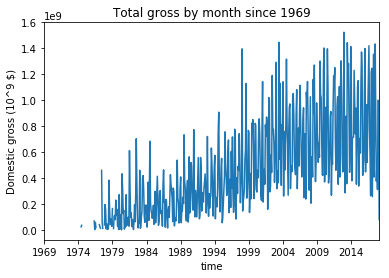

In [579]:
datenow = datetime.now()
dstart = datetime(1969,1,1)


plt.title("Total gross by month since 1969")
plt.plot(A["date_as_DT"],A["domestic_gross_clnd"])
plt.xlim([dstart ,datenow])
plt.xlabel("time")
plt.ylabel("Domestic gross (10^9 $)")

plt.show()


## Challenge 2: Plot runtime vs. domestic total gross.

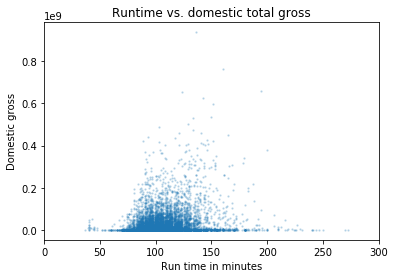

In [580]:
plt.title("Runtime vs. domestic total gross")
plt.xlabel("Run time in minutes")
plt.ylabel("Domestic gross")
plt.scatter(df.run_time_clnd, df.domestic_gross_clnd, alpha=0.2,s=2);
plt.xlim([0,300]);


## Challenge 3: Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [581]:
df.groupby(["mpaa"])["domestic_gross_clnd","run_time_clnd"].mean()

,domestic_gross_clnd,run_time_clnd
mpaa,,
G,4.258338e+07,88.284091
NC-17,2.206383e+06,107.818182
PG,4.273012e+07,101.866962
PG-13,4.939566e+07,107.126747
R,1.941881e+07,105.553383
Unrated,3.281253e+05,104.588383


## Challenge 4: Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

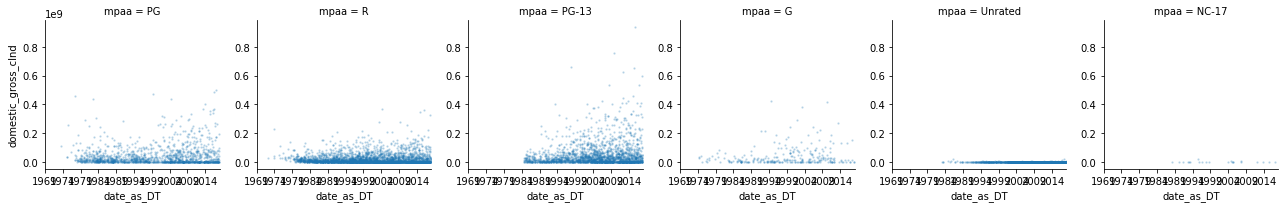

In [582]:
import seaborn as sns
g = sns.FacetGrid(df, col='mpaa')
plt.xlim([dstart ,datenow])
g.map(plt.scatter, 'date_as_DT', 'domestic_gross_clnd', alpha=0.2,s=2);


## Challenge 5: What director in your dataset has the highest gross per movie?

In [583]:
df.groupby(["Director"]).mean()["domestic_gross_clnd"].sort_values(ascending=False).index[0]

'joss whedon'

In [584]:
# could this be? See at the first 5
df.groupby(["Director"]).mean()["domestic_gross_clnd"].sort_values(ascending=False).reset_index()[0:5]

,Director,domestic_gross_clnd
0,joss whedon,369292765.0
1,gareth edwards,366426696.5
2,george lucas,348298000.2
3,jj abrams,336840977.0
4,colin trevorrow,328140791.0


In [585]:
# Instead of the average, let's see the top 5 director by total gross
df.groupby(["Director"]).sum()["domestic_gross_clnd"].sort_values(ascending=False).reset_index()[0:5]

,Director,domestic_gross_clnd
0,steven spielberg,4136178393
1,michael bay,2192439992
2,peter jackson,2090589689
3,james cameron,1976037184
4,christopher nolan,1951768210


In [586]:
# it looks correct to me

## Challenge 6: Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

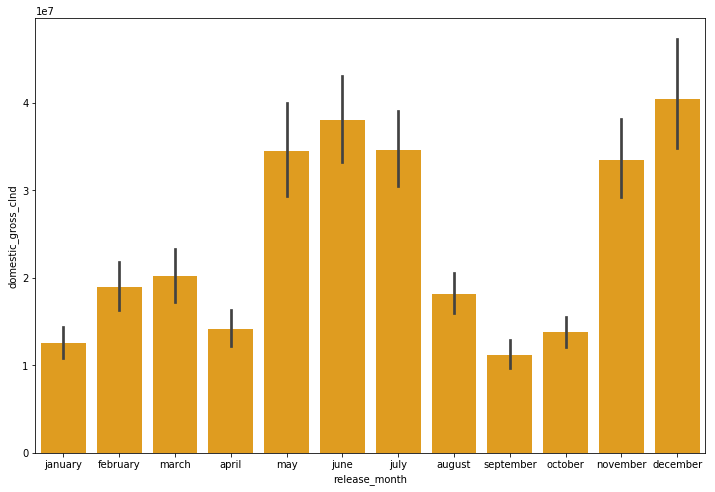

In [591]:
plt.figure(figsize=(12,8))
df["release_month"] = pd.CategoricalIndex(df.release_month, categories= ["january","february","march","april","may","june","july","august","september","october","november","december"])
sns.barplot(x="release_month", y="domestic_gross_clnd", data=df,color="orange", ci=95);

In [597]:
avg_march=df[df["release_month"]=="march"]["domestic_gross_clnd"].mean()
std_march=df[df["release_month"]=="march"]["domestic_gross_clnd"].std()



In [598]:
#Number of movies released in march
(df["release_month"]=="march").sum()

885

In [599]:
#average domestic gross
avg_march

20195071.334463276

In [600]:
avg_march-1.96*std_march

-68588937.232163399

In [601]:
avg_march+1.96*std_march

108979079.90108994

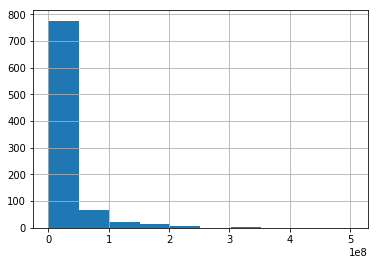

In [605]:
# while the mean correpsponds to the averag gross in march, the bar does not
# this happens because the bar assumes that the distribution is nearly normal
# plotting the gross in march, we can see that this is not the case
df[df["release_month"]=="march"]["domestic_gross_clnd"].hist()

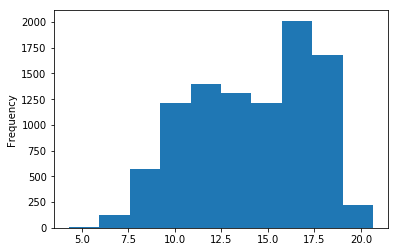

In [606]:
# Let's take the log of the gross and repeat

df["domestic_gross_clnd_log"]=df["domestic_gross_clnd"].apply(lambda x: np.log(x+1))
df["domestic_gross_clnd_log"].plot.hist()

In [609]:
# much more bell shaped, even though it is not normal

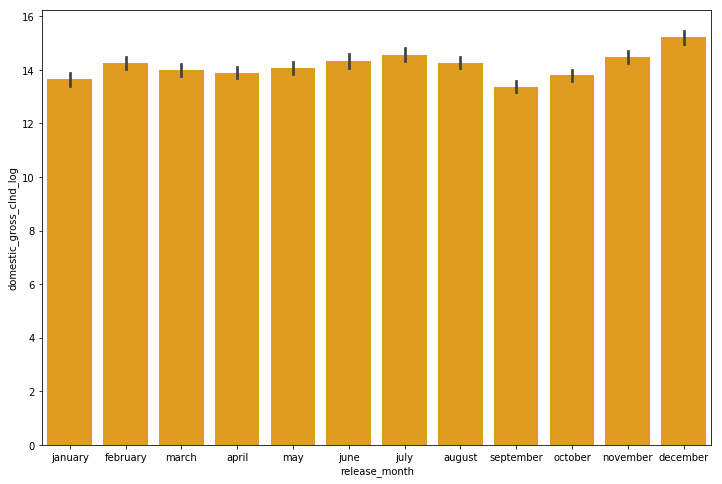

In [610]:
plt.figure(figsize=(12,8))
df["release_month"] = pd.CategoricalIndex(df.release_month, categories= ["january","february","march","april","may","june","july","august","september","october","november","december"])
sns.barplot(x="release_month", y="domestic_gross_clnd_log", data=df,color="orange", ci=95);

In [611]:
# take the average and std for the month of march
avg_march=df[df["release_month"]=="march"]["domestic_gross_clnd_log"].mean()
std_march=df[df["release_month"]=="march"]["domestic_gross_clnd_log"].std()



In [612]:
avg_march

14.004456221806709

In [613]:
avg_march-1.96*std_march

7.7543595846941269

In [614]:
avg_march+1.96*std_march

20.25455285891929

In [615]:
# disappointing.... I thought it would more or less correspond. It does not.
#I do not know why... 